First I'll import `pandas` so that I can read the data in our csv file, `numpy` to manipulate the data, and `matplotlib` and `seaborn` to create data visualizations.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
life_ex = pd.read_csv('all_data.csv')

In [4]:
life_ex.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In order to summarize the mean life expectancy and GDP for each country in our dataset, I'll use the `groupby()` and `mean()` functions together. To make the data easier to read, I'll also use the `sort_values()` function to list data in descending order of mean life expectancy. This has the added bonus of letting me know all the unique countries in our dataset.

In [13]:
life_ex.groupby('Country').mean().sort_values(by=['Life expectancy at birth (years)'], ascending=False)

,Year,Life expectancy at birth (years),GDP
Country,,,
Germany,2007.5,79.65625,3.094776e+12
Chile,2007.5,78.94375,1.697888e+11
United States of America,2007.5,78.06250,1.407500e+13
Mexico,2007.5,75.71875,9.766506e+11
China,2007.5,74.26250,4.957714e+12
Zimbabwe,2007.5,50.09375,9.062580e+09


We can see that Germany has the highest life expectancy, but not the highest GDP. This seems like two metrics that would be interesting to plot against each other.

We can also see that Zimbabwe has the lowest life expectancy by a large amount, effectively an outlier in this data. This also makes me curious how many data points we have for each country. Below I'll use the `value_counts()` method on the `Country` column to check this.

In [15]:
life_ex['Country'].value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

Nice to see that we have an equal number of data points from each country. I would also like to quickly check if there are any missing data points. The quickest way I can think of is using `isnull()` and `value_counts()` together. If there are any `True` values, we can investigate those further.

In [17]:
life_ex.isnull().value_counts()

Country  Year   Life expectancy at birth (years)  GDP  
False    False  False                             False    96
dtype: int64

An even number of values for each country with no missing data points... this data is looking pretty clean so far.

It appears from the `head()` and mean years that data is equally spread across years. It would be nice to confirm this and get the range at the same time.

In [18]:
life_ex['Year'].value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

I'd like to see how life expectancies have changed over the 16 years we have data for. First I'll make an array containing the years for the x-axis, and then create arrays of life expectancy for each country and plot them all together for comparison.

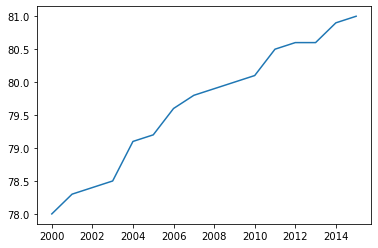

In [63]:
years = np.arange(2000,2016)
life_ex_germany = life_ex['Life expectancy at birth (years)'].loc[life_ex['Country'] == 'Germany']
plt.plot(years, life_ex_germany)